# Scraping Minimalism

In [16]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import ast

import seaborn as sns
import plotly.express as px  # type: ignore
import plotly.graph_objects as go # type: ignore
from plotly.subplots import make_subplots # type: ignore
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 1. Scraping hombres, mujeres, mochilas

In [164]:
url = "https://minimalismbrand.com/"

res = requests.get(url)
print(res.status_code)
sopa = BeautifulSoup(res.content, "html.parser")


200


In [280]:
lista_links=[]
productos_hombre = sopa.findAll("ul", {"class":"navigation__tier-1"})[1]
productos_categorias= productos_hombre.findAll("li", {"class": "navigation__item navigation__item--with-children navigation__item--with-mega-menu"})
for producto in productos_categorias:
    dic_link={}
    tema = producto.find("a").text
    dic_link["tema"]=tema
    categorias = producto.findAll("li", {"class":"navigation__item navigation__item--with-children navigation__column"})
    

    diccionario_categorias={}
    # packs, prendas, accesorios
    for cate in categorias:
        nombre_cate = cate.find("a").text
        items = cate.select("ul.navigation__tier-3 li.navigation__item a.navigation__link")
        dic_items = {item.get_text(strip=True): item['href'] for item in items}

        diccionario_categorias[nombre_cate]=dic_items

        # Imprimimos los resultados
        # for categoria, enlace in categorias:
        #     print(f"Categoría: {categoria}, Enlace: {enlace}")
    
    dic_link["categorias"]=diccionario_categorias
    lista_links.append(dic_link)
                
lista_links_final = lista_links[:2]
lista_links_hogar = lista_links[-2]
#print(productos_hombre_categorias[0])


In [166]:
#lista_links_final

In [168]:
url_base = "https://minimalismbrand.com/"

for elem in lista_links_final:
    for categoria, valor in elem["categorias"].items():
        print(categoria)
        if categoria == "Packs más vendidos":
                print("fuera")
                continue

        for item, link in valor.items():
            if item == "Tarjeta regalo" or item == "Fundas de portátil" or item=="Fundas portátil":
                print("NO")

            else:    
                print(f"   {item}")
                print(f"   {link}\n")

                url = url_base+link
                res = requests.get(url)
                sopa = BeautifulSoup(res.content, "html.parser")

                prendas = sopa.find("div", {"class":"product-list product-list--per-row-3 product-list--per-row-mob-2 product-list--per-row-mob-2 product-list--image-shape-shortest"})
                links_productos = []

                # Buscar todas las etiquetas <a> con la clase "product-link"
                productos = prendas.findAll("a", {"class": 'product-link'})
                
                enlaces_productos = [producto['href'] for producto in productos]

                elem["categorias"][categoria][item]=enlaces_productos
        



Packs más vendidos
fuera
Prendas
   Camisetas y polos
   /collections/camisetas-algodon-organico

   Calzoncillos
   /collections/calzoncillos

   Calcetines
   /collections/calcetines-algodon-organico

   Sudaderas
   /collections/sudaderas

   Jerséis
   /collections/sweater-men

   Pantalones
   /collections/pantalones-organicos-hombre

   Bañadores
   /collections/banadores

NO
Accesorios
   Mochilas
   /collections/mochilas

NO
   Carteras
   /collections/carteras

   Gorro
   /collections/gorro

   Bufanda
   /collections/bufanda

   Guantes
   /collections/guantes

Packs más vendidos
fuera
Prendas
   Camisetas
   /collections/camisetas-algodon-organico-mujer

   Ropa interior
   /collections/pack-ropa-interior-mujer-minimalista

   Calcetines
   /collections/calcetines-algodon-organico

   Sudaderas
   /collections/sudaderas-mujer

   Jerséis
   /collections/sweater-women

   Pantalones
   /collections/pantalones-organicos-mujer

NO
Accesorios
   Mochilas
   /collections/mochila

In [173]:
import json
with open('diccionario.json', 'w') as archivo:
    json.dump(lista_links_final, archivo, indent=4)

In [174]:
with open('diccionario.json', 'r') as archivo:
    lista_links_final = json.load(archivo)

In [241]:
url_cami = "https://minimalismbrand.com/products/pantalon-organico-semi-skinny-hombre"
res = requests.get(url_cami)
sopa = BeautifulSoup(res.content, "html.parser")

# Nombre producto
titulo = sopa.find("div", {"class":"title-row"}).text
print(titulo)

precio = sopa.find("div", {"class":"price-area"}).text.split()[0]
print(precio)

if "pack" in titulo.lower():
    nombres_colores=[]
    nombres_tallas=[]

else:
    if len(sopa.findAll("div", {"class":"option-selector__btns"}))==1:

        div_tallas = sopa.findAll("div", {"class":"option-selector__btns"})[0]
        nombres_tallas = [label.get_text() for label in div_tallas.find_all("span", class_="opt-label__text")]
        print(nombres_tallas)

        nombres_colores = []
        

    else:
        # Colores y tallas
        div_colores = sopa.findAll("div", {"class":"option-selector__btns"})[0]
        div_tallas = sopa.findAll("div", {"class":"option-selector__btns"})[1]

        nombres_colores = [label.get_text() for label in div_colores.find_all("span", class_="opt-label__text")]
        print(nombres_colores)
        nombres_tallas = [label.get_text() for label in div_tallas.find_all("span", class_="opt-label__text")]
        print(nombres_tallas)

# Descripción
parr = sopa.find("div", {"class":"cc-accordion-item__content rte cf"})
descripcion = parr.text

# Impacto 
impacto = sopa.find("span", {"class":"metafield-multi_line_text_field"}).text
print(impacto)




Pantalón orgánico Slim Hombre

€70.00
['38', '40', '42', '44', '46']
10,7 kg de emisiones de CO2 evitados
2.985 litros de agua ahorrados
35,4 kWh de energía ahorrados


In [248]:
diccionario_csv = {
    "tema": [],
    "categoria": [],
    "subcategoria": [],
    "nombre":[],
    "precio":[],
    "colores":[],
    "tallas":[],
    "descripcion":[],
    "imapcto":[]
}

for elem in lista_links_final:
    #diccionario_csv["tema"].append(elem["tema"])

    # categoria: prendas, packs, accesorios
    for categoria, valor in elem["categorias"].items():

        # Se gestiona a parte
        if categoria == "Packs más vendidos":
                print("fuera")
                continue
        
        # diccionario_csv["categoria"]=categoria

        #---------------ITEMS-------------------
        for item, lista_links in valor.items():

            if item == "Tarjeta regalo" or item == "Fundas de portátil" or item=="Fundas portátil":
                print("NO")
            
            else:
                #diccionario_csv["subcategorias"]=item

                for link in lista_links:
                    print(link)
                    url_item = "https://minimalismbrand.com"+link
                    res = requests.get(url_item)
                    sopa = BeautifulSoup(res.content, "html.parser")

                    # Nombre producto
                    titulo = sopa.find("div", {"class":"title-row"}).text
                    #print(titulo)

                    precio = sopa.find("div", {"class":"price-area"}).text.split()[0]
                    #print(precio)

                    terminos_buscar = ["pack", "x2", "x3", "x5", "x7", "mochila", "bolso", "cartera", "gorro"]
                    if any(termino in titulo.lower() for termino in terminos_buscar):
                        nombres_colores=[]
                        nombres_tallas=[]

                    else:

                        if len(sopa.findAll("div", {"class":"option-selector__btns"}))==1:

                            div_tallas = sopa.findAll("div", {"class":"option-selector__btns"})[0]
                            nombres_tallas = [label.get_text() for label in div_tallas.find_all("span", class_="opt-label__text")]
                            print(nombres_tallas)

                            nombres_colores = []

                        else:
                            # Colores y tallas
                            div_colores = sopa.findAll("div", {"class":"option-selector__btns"})[0]
                            div_tallas = sopa.findAll("div", {"class":"option-selector__btns"})[1]

                            nombres_colores = [label.get_text() for label in div_colores.find_all("span", class_="opt-label__text")]
                            #print(nombres_colores)
                            nombres_tallas = [label.get_text() for label in div_tallas.find_all("span", class_="opt-label__text")]
                            #print(nombres_tallas)

                    # Descripción
                    parr = sopa.find("div", {"class":"cc-accordion-item__content rte cf"})
                    descripcion = parr.text

                    # Impacto
                    try:
                        impacto = sopa.find("span", {"class":"metafield-multi_line_text_field"}).text
                        #print(impacto)
                    except:
                        impacto=""

                    diccionario_csv["tema"].append(elem["tema"])
                    diccionario_csv["categoria"].append(categoria)
                    diccionario_csv["subcategoria"].append(item)
                    diccionario_csv["nombre"].append(titulo)
                    diccionario_csv["precio"].append(precio)
                    diccionario_csv["colores"].append(nombres_colores)
                    diccionario_csv["tallas"].append(nombres_tallas)
                    diccionario_csv["descripcion"].append(descripcion)
                    diccionario_csv["imapcto"].append(impacto)



fuera
/products/camiseta-algodon-organico?variant=34948534108317
/products/camiseta-algodon-organico?variant=34948534108317
/products/camiseta-algodon-organico?variant=34948524540061
/products/camiseta-algodon-organico?variant=34948524540061
/products/camiseta-algodon-organico?variant=47057331650895
/products/camiseta-algodon-organico?variant=47057331650895
/products/camiseta-algodon-organico?variant=34948530765981
/products/camiseta-algodon-organico?variant=34948530765981
/products/camiseta-algodon-organico?variant=48043523866959
/products/camiseta-algodon-organico?variant=48043523866959
/products/camiseta-algodon-organico?variant=34948537417885
/products/camiseta-algodon-organico?variant=34948537417885
/products/camiseta-algodon-organico?variant=34948539482269
/products/camiseta-algodon-organico?variant=34948539482269
/products/camiseta-algodon-organico?variant=48043509055823
/products/camiseta-algodon-organico?variant=48043509055823
/products/camiseta-algodon-organico?variant=490480

In [249]:
df_hombre_mujer = pd.DataFrame(diccionario_csv)
df_hombre_mujer.to_csv("../datos/df_hombre_mujer.csv")

In [250]:
df_hombre_mujer.columns

Index(['tema', 'categoria', 'subcategoria', 'nombre', 'precio', 'colores',
       'tallas', 'descripcion', 'imapcto'],
      dtype='object')

In [259]:
df_hombre_mujer["imapcto"].unique()

array([' \n¿Por qué decimos que esta camiseta es sostenible?\n\n- Es confeccionada con algodón 100% orgánico\n- Está fabricada en el norte de Portugal, a pocos kilómetros de nuestro almacén y de nuestro consumidor final\n- Al emplear materiales de primera calidad su durabilidad incrementa enormemente\n- Empleamos packaging totalmente reciclado y reciclable\n\n\nElegir la camiseta Minimalism, fabricada con algodón orgánico certificado (OCS 100), en lugar de una camiseta genérica supone ahorrar:\n\n- 2,4 kg de emisiones de CO2\n- 614,9 litros de agua\n- 3,8 kWh de energía\n\nDatos de sostenibilidad auditados por Green Story',
       ' \n¿Por qué decimos que nuestras camisetas son sostenibles?\n\n- Están confeccionadas con algodón 100% orgánico\n- Se fabrican en el norte de Portugal, a pocos kilómetros de nuestro almacén y de nuestro consumidor final\n- Al emplear materiales de primera calidad su durabilidad incrementa enormemente\n- Empleamos packaging totalmente reciclado y reciclable\n

In [274]:
df_hombre_mujer.head(1)

,tema,categoria,subcategoria,nombre,precio,colores,tallas,descripcion,imapcto
0,Hombre,Prendas,Camisetas y polos,\nCamiseta algodón orgánico negra\n,€25.00,"[Negra, Blanca, Crudo, Gris Jaspeado, Lava Gre...","[XS, S, M, L, XL, XXL]",Camisetas de algodón orgánico negra. Al emplea...,\n¿Por qué decimos que esta camiseta es soste...


In [269]:
df_hombre_mujer.duplicated(["tema", "nombre", "precio", "descripcion"]).sum()

np.int64(313)

In [272]:
df_sin_duplicados = df_hombre_mujer.drop_duplicates(["tema","categoria", "subcategoria", "nombre"])

In [275]:
df_sin_duplicados.to_csv("../datos/df_sin_duplicados.csv")

________________________________

### 2. Scraping de Hogar

In [287]:
lista_links_hogar

{'tema': 'Hogar',
 'categorias': {'Esenciales para tu hogar': {'Sábanas de algodón': '/collections/sabanas-de-algodon',
   'Toallas de baño': '/collections/toallas',
   'Gel de ducha sólido': '/collections/gel-solido',
   'Champú sólido': '/collections/champu-solido',
   'Trapo segunda vida': '/products/pano-material-reciclado-x4'}}}

In [307]:
url_base = "https://minimalismbrand.com/"
lista_links=[]

for categoria, valor in lista_links_hogar["categorias"].items():
    print(categoria)
    
    for item, link in valor.items():
            
        print(f"   {item}")
        print(f"   {link}")

        if item != "Trapo segunda vida":
            url = url_base+link
            res = requests.get(url)
            sopa = BeautifulSoup(res.content, "html.parser")

            prendas = sopa.find("div", {"class":"product-list product-list--per-row-3 product-list--per-row-mob-2 product-list--per-row-mob-2 product-list--image-shape-shortest"})
            links_productos = []

            # Buscar todas las etiquetas <a> con la clase "product-link"
            productos = prendas.findAll("a", {"class": 'product-link'})
            enlaces_productos = [producto['href'] for producto in productos]
      
            # Nombre producto
            titulos = prendas.find_all('h3', class_='product-block__title')

            # Creamos una lista para almacenar los títulos
            titulos_lista = []

            # Extraemos los títulos y los agregamos a la lista
            for titulo in titulos:
                titulos_lista.append(titulo.get_text(strip=True))

            lista_links.append({"titulos":titulos_lista, "links":enlaces_productos})


Esenciales para tu hogar
   Sábanas de algodón
   /collections/sabanas-de-algodon
   Toallas de baño
   /collections/toallas
   Gel de ducha sólido
   /collections/gel-solido
   Champú sólido
   /collections/champu-solido
   Trapo segunda vida
   /products/pano-material-reciclado-x4


In [308]:
lista_links

[{'titulos': ['Juego de sábanas · Algodón orgánico - 105x200',
   'Juego de sábanas · Algodón orgánico - 135x200',
   'Juego de sábanas · Algodón orgánico - 150x200',
   'Juego de sábanas · Algodón orgánico - 180x200'],
  'links': ['/products/juego-de-sabanas-de-algodon-organico?variant=47272870478159',
   '/products/juego-de-sabanas-de-algodon-organico?variant=47272870478159',
   '/products/juego-de-sabanas-de-algodon-organico?variant=47272870740303',
   '/products/juego-de-sabanas-de-algodon-organico?variant=47272870740303',
   '/products/juego-de-sabanas-de-algodon-organico?variant=47272870773071',
   '/products/juego-de-sabanas-de-algodon-organico?variant=47272870773071',
   '/products/juego-de-sabanas-de-algodon-organico?variant=47272870805839',
   '/products/juego-de-sabanas-de-algodon-organico?variant=47272870805839']},
 {'titulos': ['Toalla lavabo · Algodón orgánico - \n                  Blanco',
   'Toalla lavabo · Algodón orgánico - \n                  Marfil',
   'Toalla de 

In [314]:
# Añadimos los links y nombres de cada producto


url_base = "https://minimalismbrand.com/"
lista_links=[]

for categoria, valor in lista_links_hogar["categorias"].items():
    print(categoria)
    
    for item, link in valor.items():
            
        print(f"   {item}")
        print(f"   {link}")

        if item != "Trapo segunda vida":
            url = url_base+link
            res = requests.get(url)
            soup = BeautifulSoup(res.content, "html.parser")
     

            # Encontramos todos los bloques de producto
            productos = soup.find_all('div', class_='product-block')

            # Creamos una lista para almacenar los diccionarios
            productos_info = []

            # Iteramos sobre los productos para extraer título y enlace
            for producto in productos:
                # Intentamos encontrar el título del producto
                titulo_tag = producto.find('h3', class_='product-block__title')
                titulo = titulo_tag.get_text(strip=True) if titulo_tag else 'No disponible'
                
                # Extraemos el enlace del producto
                enlace_tag = producto.find('a', class_='product-link')
                enlace = enlace_tag['href'] if enlace_tag else 'No disponible'
                
                if titulo != 'No disponible':
                    # Almacenamos el título y el enlace en un diccionario
                    producto_dict = {
                        'titulo': titulo,
                        'enlace': enlace
                    }
                    
                    # Agregamos el diccionario a la lista
                    productos_info.append(producto_dict)

            lista_links_hogar["categorias"][categoria][item]=productos_info

            #print(productos_info)

Esenciales para tu hogar
   Sábanas de algodón
   /collections/sabanas-de-algodon
   Toallas de baño
   /collections/toallas
   Gel de ducha sólido
   /collections/gel-solido
   Champú sólido
   /collections/champu-solido
   Trapo segunda vida
   /products/pano-material-reciclado-x4


In [382]:
#lista_links_hogar

In [362]:
diccionario_csv = {
    "tema": [],
    "categoria": [],
    "subcategoria": [],
    "nombre":[],
    "precio":[],
    "colores":[],
    "tallas":[],
    "descripcion":[],
    "imapcto":[]
}


for categoria, valor in lista_links_hogar["categorias"].items():

    for item, lista_dic in valor.items():

        if item != "Trapo segunda vida":
            
            for par in lista_dic:

                link=par["enlace"]
                url_item = "https://minimalismbrand.com"+link
                res = requests.get(url_item)
                sopa = BeautifulSoup(res.content, "html.parser")

                # Nombre producto
                titulo_splited = par["titulo"].split("-")
                titulo = titulo_splited[0]
                #print(titulo)
                
                if len(titulo_splited)>1 and item == "Sábanas de algodón":
                    nombres_tallas=[titulo_splited[1]]
                    nombres_colores=[]

                elif len(titulo_splited)>1:
                    nombres_colores=[titulo_splited[1].replace("\n","")]
                    nombres_tallas=[]
                else:
                    nombres_colores=[]
                    nombres_tallas=[]

                #Precio
                precio = sopa.find("div", {"class":"price-area"}).text.split()[0]
                #print(precio)

  
                # Descripción
                parr = sopa.find("div", {"class":"cc-accordion-item__content rte cf"})
                descripcion = parr.text

                # Impacto
                try:
                    impacto = sopa.find("span", {"class":"metafield-multi_line_text_field"}).text
                    #print(impacto)
                except:
                    impacto=""

                diccionario_csv["tema"].append(lista_links_hogar["tema"])
                diccionario_csv["categoria"].append(categoria)
                diccionario_csv["subcategoria"].append(item)
                diccionario_csv["nombre"].append(titulo)
                diccionario_csv["precio"].append(precio)
                diccionario_csv["colores"].append(nombres_colores)
                diccionario_csv["tallas"].append(nombres_tallas)
                diccionario_csv["descripcion"].append(descripcion)
                diccionario_csv["imapcto"].append(impacto)



In [363]:
df_hogar = pd.DataFrame(diccionario_csv)
df_hogar.to_csv("../datos/df_hogar.csv")

In [364]:
df_hogar.head(1)

,tema,categoria,subcategoria,nombre,precio,colores,tallas,descripcion,imapcto
0,Hogar,Esenciales para tu hogar,Sábanas de algodón,Juego de sábanas · Algodón orgánico,€70.00,[],[ 105x200],\nRopa de cama suave al tacto confeccionada c...,


__________________________

### 3. Scraping de Niños

In [368]:
url_ninios="https://minimalismbrand.com/collections/camisetas-algodon-organico-nino-a"

In [375]:
res = requests.get(url_ninios)
soup = BeautifulSoup(res.content, "html.parser")


# Encontramos todos los bloques de producto
productos = soup.find_all('div', class_='product-block')

# Creamos una lista para almacenar los diccionarios
productos_info = []

# Iteramos sobre los productos para extraer título y enlace
for producto in productos:
    # Intentamos encontrar el título del producto
    titulo_tag = producto.find('h3', class_='product-block__title')
    titulo = titulo_tag.get_text(strip=True) if titulo_tag else 'No disponible'
    
    # Extraemos el enlace del producto
    enlace_tag = producto.find('a', class_='product-link')
    enlace = enlace_tag['href'] if enlace_tag else 'No disponible'
    
    if titulo != 'No disponible':
        # Almacenamos el título y el enlace en un diccionario
        producto_dict = {
            'titulo': titulo,
            'enlace': enlace
        }
        
        # Agregamos el diccionario a la lista
        productos_info.append(producto_dict)


In [376]:
productos_info

[{'titulo': 'Camiseta algodón orgánico niño x3',
  'enlace': '/products/camiseta-algodon-organico-nino-x3'},
 {'titulo': 'Camiseta algodón orgánico niño x5',
  'enlace': '/products/camiseta-algodon-organico-nino-x5'},
 {'titulo': 'Camiseta algodón orgánico niño x7',
  'enlace': '/products/camiseta-algodon-organico-nino-x7'},
 {'titulo': 'Camiseta algodón orgánico niño/a - \n                  Negra',
  'enlace': '/products/camiseta-algodon-organico-nino?variant=46638545633615'},
 {'titulo': 'Camiseta algodón orgánico niño/a - \n                  Blanca',
  'enlace': '/products/camiseta-algodon-organico-nino?variant=46638545535311'},
 {'titulo': 'Camiseta algodón orgánico niño/a - \n                  Gris',
  'enlace': '/products/camiseta-algodon-organico-nino?variant=46638545731919'}]

In [377]:
diccionario_csv = {
    "tema": [],
    "categoria": [],
    "subcategoria": [],
    "nombre":[],
    "precio":[],
    "colores":[],
    "tallas":[],
    "descripcion":[],
    "imapcto":[]
}

            
for par in productos_info:

    link=par["enlace"]
    url_item = "https://minimalismbrand.com"+link
    res = requests.get(url_item)
    sopa = BeautifulSoup(res.content, "html.parser")

    # Nombre producto
    titulo_splited = par["titulo"].split("-")
    titulo = titulo_splited[0]
    #print(titulo)
    
    if len(titulo_splited)>1 and item == "Sábanas de algodón":
        nombres_tallas=[titulo_splited[1]]
        nombres_colores=[]

    elif len(titulo_splited)>1:
        nombres_colores=[titulo_splited[1].replace("\n","")]
        nombres_tallas=[]
    else:
        nombres_colores=[]
        nombres_tallas=[]

    #Precio
    precio = sopa.find("div", {"class":"price-area"}).text.split()[0]
    #print(precio)


    # Descripción
    parr = sopa.find("div", {"class":"cc-accordion-item__content rte cf"})
    descripcion = parr.text

    # Impacto
    try:
        impacto = sopa.find("span", {"class":"metafield-multi_line_text_field"}).text
        #print(impacto)
    except:
        impacto=""

    diccionario_csv["tema"].append("Ninios")
    diccionario_csv["categoria"].append("Prendas")
    diccionario_csv["subcategoria"].append("Camisetas")
    diccionario_csv["nombre"].append(titulo)
    diccionario_csv["precio"].append(precio)
    diccionario_csv["colores"].append(nombres_colores)
    diccionario_csv["tallas"].append(nombres_tallas)
    diccionario_csv["descripcion"].append(descripcion)
    diccionario_csv["imapcto"].append(impacto)



In [379]:
df_ninios=pd.DataFrame(diccionario_csv)
df_ninios

,tema,categoria,subcategoria,nombre,precio,colores,tallas,descripcion,imapcto
0,Ninios,Prendas,Camisetas,Camiseta algodón orgánico niño x3,€24.00,[],[],\nCamisetas confeccionados con 100% algodón or...,¿Por qué las camisetas de niño de Minimalism s...
1,Ninios,Prendas,Camisetas,Camiseta algodón orgánico niño x5,€35.00,[],[],\nCamisetas confeccionados con 100% algodón or...,¿Por qué las camisetas de niño de Minimalism s...
2,Ninios,Prendas,Camisetas,Camiseta algodón orgánico niño x7,€42.00,[],[],\nCamisetas confeccionados con 100% algodón or...,¿Por qué las camisetas de niño de Minimalism s...
3,Ninios,Prendas,Camisetas,Camiseta algodón orgánico niño/a,€9.00,[ Negra],[],Camisetas confeccionados con 100% algodón orgá...,¿Por qué las camisetas de niño de Minimalism s...
4,Ninios,Prendas,Camisetas,Camiseta algodón orgánico niño/a,€9.00,[ Blanca],[],Camisetas confeccionados con 100% algodón orgá...,¿Por qué las camisetas de niño de Minimalism s...
5,Ninios,Prendas,Camisetas,Camiseta algodón orgánico niño/a,€9.00,[ Gris],[],Camisetas confeccionados con 100% algodón orgá...,¿Por qué las camisetas de niño de Minimalism s...


In [381]:
df_final = pd.concat([df_sin_duplicados, df_ninios, df_hogar])
df_final.reset_index(drop=True)
df_final.to_csv("../datos/df_final.csv")


___________________________

In [50]:
df_final = pd.read_csv("../datos/df_final.csv", index_col=0)

# Pasamos la columnas a float
df_final["precio"] = df_final["precio"].str.replace("€","").astype(float)

# Hay varias columnas donde los colores y tallas estn cambiados
lista_tallas = "['XS', 'S', 'M', 'L', 'XL']"
mask = df_final['colores']==lista_tallas
df_final.loc[mask, ['colores', 'tallas']] = df_final.loc[mask, ['tallas', 'colores']].values

In [51]:

# Asegurarse de que la columna 'colores' tiene listas y no cadenas de texto
df_final['colores'] = df_final['colores'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_minimalis = df_final.explode('colores')

# Limipamos los nombres
df_minimalis["nombre"] = df_minimalis["nombre"].str.replace("\n","")

# Lo guardamos
df_minimalis.to_csv("../datos/df_minimalis.csv")
df_minimalis.head(2)

,tema,categoria,subcategoria,nombre,precio,colores,tallas,descripcion,imapcto
0,Hombre,Prendas,Camisetas y polos,Camiseta algodón orgánico negra,25.0,Negra,"['XS', 'S', 'M', 'L', 'XL', 'XXL']",Camisetas de algodón orgánico negra. Al emplea...,\n¿Por qué decimos que esta camiseta es soste...
0,Hombre,Prendas,Camisetas y polos,Camiseta algodón orgánico negra,25.0,Blanca,"['XS', 'S', 'M', 'L', 'XL', 'XXL']",Camisetas de algodón orgánico negra. Al emplea...,\n¿Por qué decimos que esta camiseta es soste...


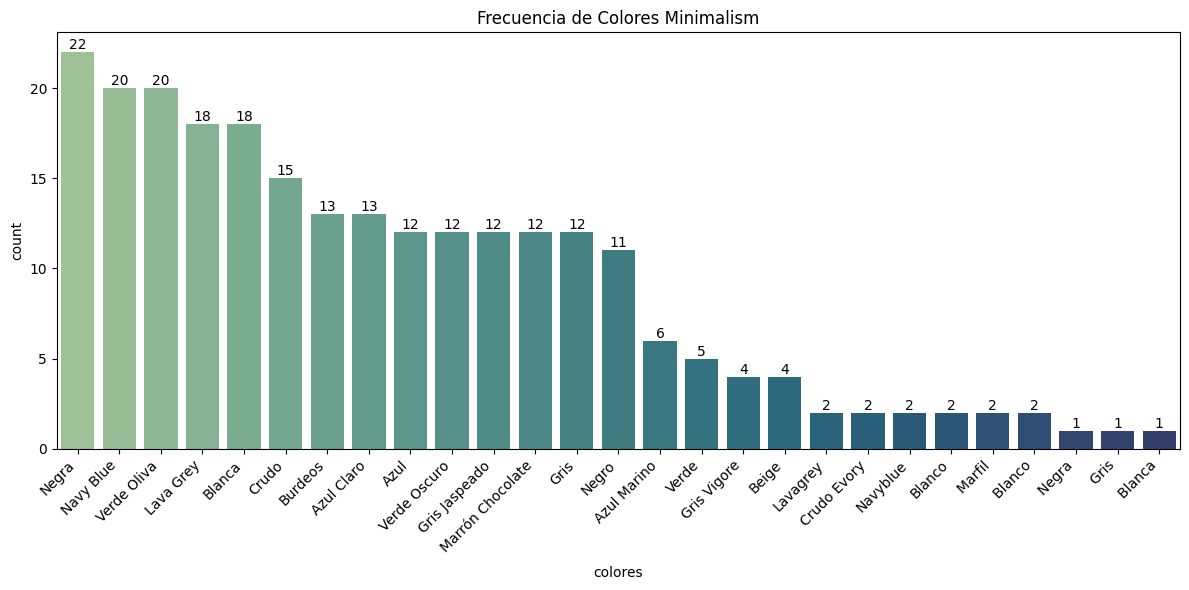

In [52]:
# Filtrar el DataFrame y establecer el orden
df_colores = df_minimalis[df_minimalis["colores"].notna()]
order = df_colores['colores'].value_counts().index

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras con la paleta y el orden especificado
sns.countplot(data=df_colores, x="colores", order=order, palette="crest")

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha="right")

# Agregar un título
plt.title("Frecuencia de Colores Minimalism")

# Agregar etiquetas de conteo encima de cada barra
for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,  # Posición en el eje x (centro de la barra)
        p.get_height(),             # Posición en el eje y (ligeramente encima de la barra)
        int(p.get_height()),            # Texto (el valor de la altura de la barra)
        ha="center",                    # Alinear horizontalmente el texto en el centro
        va="bottom"                     # Alinear verticalmente el texto en la parte inferior
    )

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [53]:
df_minimalis.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,360.0,37.652444,25.682327,8.0,25.0,25.0,50.0,154.0


In [57]:
df_resultado = df_minimalis.groupby("subcategoria")["precio"].mean().reset_index()
df_resultado['precio'] = df_resultado['precio'].round(2)
df_resultado

,subcategoria,precio
0,Bañadores,55.00
1,Bufanda,24.00
2,Calcetines,23.08
3,Calzoncillos,50.00
4,Camisetas,50.00
5,Camisetas y polos,30.01
6,Carteras,25.50
7,Champú sólido,29.33
8,Gel de ducha sólido,29.33
9,Gorro,19.00
